# Our objectives: (Everything is TODO, first code and then embellishments)

## Libraries and Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('Imported all libraries')

Imported all libraries


In [5]:
dataset_path = 'South_Asian_DevData.csv'
development_dataset = pd.read_csv(dataset_path)
print('Dataset csv name:', dataset_path)

Dataset csv name: South_Asian_DevData.csv


# Let's see first how our database is structured and overview

In [57]:
pd.set_option('display.max_columns', None)
development_dataset.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,"Population, total",Population growth (annual %),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)","Literacy rate, adult total (% of people ages 15 and above)","School enrollment, primary (% gross)",Urban population (% of total population),Access to electricity (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,19542982,1.443803,NaN,55.298,92.0,NaN,22.162991,22.078,4.4,27.441856,20.970919,0.054813,64.767280,45.0,1.852782,4.787234,-2.438969,-2.080253,-1.780661,-2.031417,NaN,NaN,NaN
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,19688632,0.742517,NaN,55.798,89.3,NaN,22.908590,22.169,9.3,27.473580,20.982349,0.050196,64.597573,45.6,1.852782,NaN,NaN,NaN,NaN,NaN,0.004723,NaN,NaN
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,21000256,6.449321,NaN,56.454,86.6,NaN,75.959747,22.261,14.1,29.674863,22.541339,0.046328,64.416888,37.8,1.852782,4.761905,-2.035034,-1.811546,-1.673473,-1.433421,0.004561,NaN,NaN
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,22645130,7.541019,NaN,57.344,83.7,NaN,96.553680,22.353,19.0,31.875589,24.100333,0.046756,64.176231,36.7,1.852782,4.761905,-2.198372,-1.463108,-1.558294,-1.177571,0.087891,NaN,NaN
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,23553551,3.933178,NaN,57.944,80.9,NaN,106.252663,22.500,23.8,34.094431,25.666240,0.039875,63.826609,44.2,1.852782,6.403941,-2.295682,-1.511549,-1.693925,-1.203034,0.105809,NaN,NaN


### Which countries are represented?

In [9]:
countries_list = development_dataset['Country'].unique()
for country in countries_list:
    print(country)

Afghanistan
Bhutan
Bangladesh
India
Maldives
Sri Lanka
Nepal
Pakistan


### Our database should be mostly numbers, we should check the dtypes

In [11]:
development_dataset.dtypes

Country                                                                        object
Year                                                                            int64
GDP (current US$)                                                             float64
GDP growth (annual %)                                                         float64
GDP per capita (current US$)                                                  float64
Unemployment, total (% of total labor force) (modeled ILO estimate)           float64
Inflation, consumer prices (annual %)                                         float64
Foreign direct investment, net inflows (% of GDP)                             float64
Trade (% of GDP)                                                              float64
Gini index                                                                    float64
Population, total                                                               int64
Population growth (annual %)                          

### Percentage of values missing, also e should be careful as we have missing values simbolized both as the default 'NaN' and '..'
Let's use numpy and replace all '..' with NaNs

In [35]:
development_dataset.replace('..', np.nan, inplace=True)
missing_count = development_dataset.isnull().sum().sum()
total_cells = np.product(development_dataset.shape)
total_missing_cells = (missing_count / total_cells) * 100
print('%.2f' %total_missing_cells, '%')

15.61 %


## Our dataset seems to be in need of cleaning and preprocessing
    1. We should convert all objects in floats except for [Country]
    2. Handle all missing values which amount to almost 16% of our database

### 1. We should convert all objects in floats except for [Country]

In [16]:
for column in development_dataset.columns[1:]:
    development_dataset[column] = pd.to_numeric(development_dataset[column], errors='ignore')
    
#In the future when 'ignore' is deprecated, we might do:
#try:
#    development_dataset[column] = pd.to_numeric(development_dataset[column])
#except ValueError:
#    pass

development_dataset.dtypes

C:\Users\Sconosciuto\AppData\Local\Temp\ipykernel_3648\1889544906.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  development_dataset[column] = pd.to_numeric(development_dataset[column], errors='ignore')


Country                                                                        object
Year                                                                            int64
GDP (current US$)                                                             float64
GDP growth (annual %)                                                         float64
GDP per capita (current US$)                                                  float64
Unemployment, total (% of total labor force) (modeled ILO estimate)           float64
Inflation, consumer prices (annual %)                                         float64
Foreign direct investment, net inflows (% of GDP)                             float64
Trade (% of GDP)                                                              float64
Gini index                                                                    float64
Population, total                                                               int64
Population growth (annual %)                          

### 2. Let's see where are our errors and to either average them or leave them

In [18]:
development_dataset.isnull().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

Text(0.5, 1.0, 'Count of correct values')

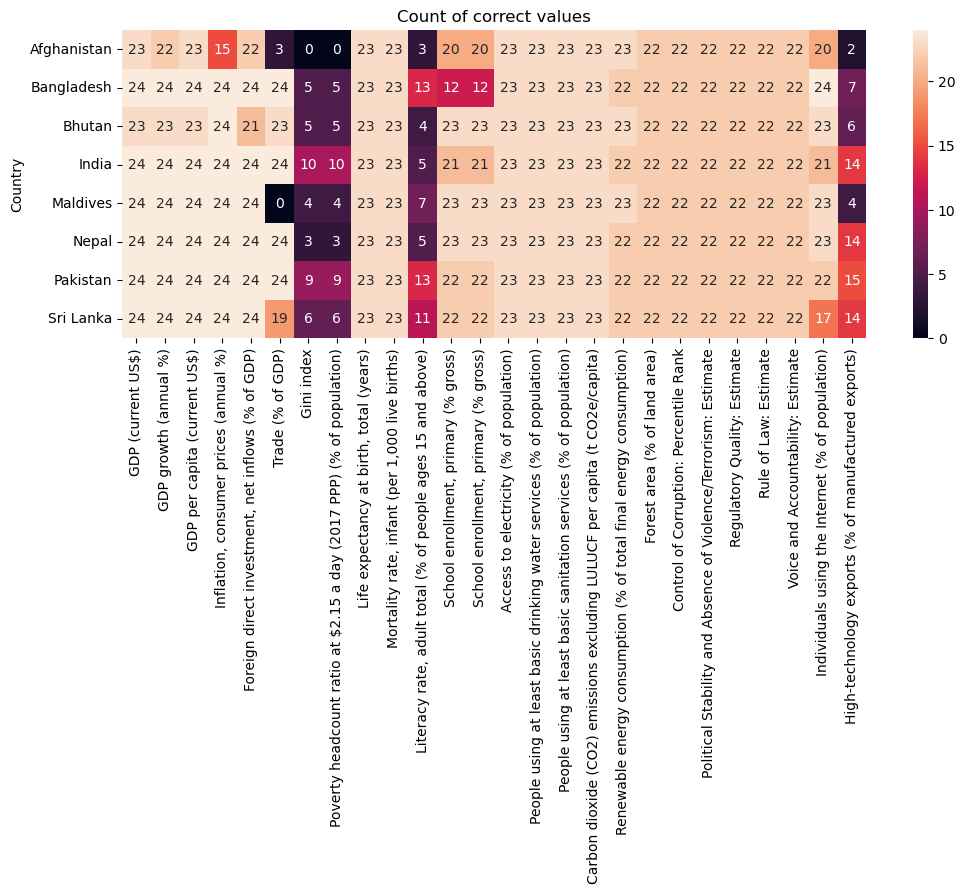

In [96]:
columns_with_nan = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Inflation, consumer prices (annual %)',
    'Foreign direct investment, net inflows (% of GDP)',
    'Trade (% of GDP)',
    'Gini index',
    'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
    'Life expectancy at birth, total (years)',
    'Mortality rate, infant (per 1,000 live births)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'School enrollment, primary (% gross)',
    'School enrollment, primary (% gross)',
    'Access to electricity (% of population)',
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Forest area (% of land area)',
    'Control of Corruption: Percentile Rank',
    'Political Stability and Absence of Violence/Terrorism: Estimate',
    'Regulatory Quality: Estimate',
    'Rule of Law: Estimate',
    'Voice and Accountability: Estimate',
    'Individuals using the Internet (% of population)',
    'High-technology exports (% of manufactured exports)'
]

correct_values_dataset = development_dataset.groupby(['Country'])[columns_with_nan].count() # .count() counts only valid numeric values
plt.figure(figsize=(12,4))
sns.heatmap(data=correct_values_dataset, annot=True)
plt.title('Count of correct values')

Oh mama, it seems like 4 of our columns contain an extreme lack of entries
In addition Afghanistan, given the historical context, doesn't have much

In [20]:
development_dataset.groupby(['Country'])['GDP (current US$)'].count()

Country
Afghanistan    23
Bangladesh     24
Bhutan         23
India          24
Maldives       24
Nepal          24
Pakistan       24
Sri Lanka      24
Name: GDP (current US$), dtype: int64

### We might find more insight in a per-country basis and being careful about what stories our missing values co
    1. For GDP we might be able to average between year before and after
    2. Trade (%) and High-technology export are very important factors that we might not be able to use in our analysis
    3. Gini index, Poverty headcount is very important for wealth disparity
    4. We might not be able to analyze education, research expenditure effects on some countries
    5. Missing values in political areas
    6. Green policies with development

## Economy Overview
### We should identify and classify all our columns in specific macro groups either by hand or with ML, let's do both and compare
    1.